### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")
x_project = np.load("Xtest_Classification1.npy")

x = x.reshape(-1, 28, 28, 3)
x_project = x_project.reshape(-1, 28, 28, 3)

true_count = 0
false_count = 0

for value in y:
    if value:
        true_count += 1
    else:
        false_count += 1

print("Number of True values:", true_count)
print("Number of False values:", false_count)

Number of True values: 896
Number of False values: 5358


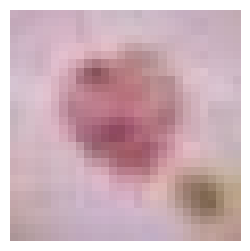

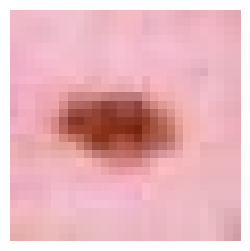

In [9]:
for i in range(2):
    color_image = np.stack([x[i][:,:,0], x[i][:,:,1], x[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()

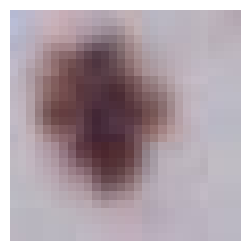

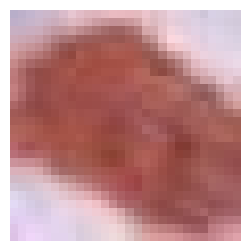

In [10]:
for i in range(2):
    color_image = np.stack([x_project[i][:,:,0], x_project[i][:,:,1], x_project[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()

Start

In [23]:
X_train, X_test, y_train, y_test = train_test_split((x).astype('float32')/255.0, tf.keras.utils.to_categorical(y,2), test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.shape)

(5003, 28, 28, 3) (1251, 28, 28, 3) (5003, 2) (1251, 2)
(5003, 2)


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/500
79/79 [==============================] - 3s 32ms/step - loss: 0.4058 - accuracy: 0.8517 - val_loss: 0.3815 - val_accuracy: 0.8433
Epoch 2/500
79/79 [==============================] - 3s 35ms/step - loss: 0.3607 - accuracy: 0.8601 - val_loss: 0.3721 - val_accuracy: 0.8433
Epoch 3/500
79/79 [==============================] - 2s 29ms/step - loss: 0.3435 - accuracy: 0.8601 - val_loss: 0.3540 - val_accuracy: 0.8433
Epoch 4/500
79/79 [==============================] - 2s 29ms/step - loss: 0.3293 - accuracy: 0.8599 - val_loss: 0.3549 - val_accuracy: 0.8433
Epoch 5/500
79/79 [==============================] - 2s 26ms/step - loss: 0.3317 - accuracy: 0.8613 - val_loss: 0.3327 - val_accuracy: 0.8449
Epoch 6/500
79/79 [==============================] - 2s 27ms/step - loss: 0.3193 - accuracy: 0.8581 - val_loss: 0.3153 - val_accuracy: 0.8449
Epoch 7/500
79/79 [==============================] - 2s 26ms/step - loss: 0.3219 - accuracy: 0.8599 - val_loss: 0.3131 - val_accuracy: 0.8481
Epoch 